# XAS Simulation Comparison

In [2]:
import os
import matplotlib.pyplot as plt

from xas_simulator.simulation import create_simulation
from xas_simulator.beamline_data_loader import display_scans, get_scan_paths
from xas_simulator.xmcd_analysis import calculate_xmcd, compare_spectra

Writable TEMPDIR = /tmp


## Load data

In [3]:
data_directory = '/dls/i06-1/data/2024/mm34159-2'
# data_directory = r'\\dc.diamond.ac.uk\dls\i06-1\data\2024\mm34159-2'
# data_directory = r'C:\Users\grp66007\data_test\i06-1_data\2024\mm34159-2'
scan_numbers = range(339089, 339093)
filenames = [os.path.join(data_directory, f'i06-1-{n}.nxs') for n in scan_numbers]

print('--- I06-1 Data ---')
print(data_directory)
print(display_scans(filenames))

# Analyse data
energy_path, signal_path, monitor_path, pol_path = get_scan_paths(filenames[0])
av_energy, interp_pc, interp_nc, diff = calculate_xmcd(filenames, energy_path, signal_path, pol_path, monitor_path)

--- I06-1 Data ---
/dls/i06-1/data/2024/mm34159-2
i06-1-339089.nxs pol=pc, T=270.0K, B=   6.0T, scan fastEnergy 0.0 249.0 1.0 fesData 0 1
i06-1-339090.nxs pol=pc, T=270.0K, B=   6.0T, scan fastEnergy 0.0 249.0 1.0 fesData 0 1
i06-1-339091.nxs pol=nc, T=270.0K, B=   6.0T, scan fastEnergy 0.0 249.0 1.0 fesData 0 1
i06-1-339092.nxs pol=nc, T=270.0K, B=   6.0T, scan fastEnergy 0.0 249.0 1.0 fesData 0 1


## Simulation

In [4]:
# Create and run Quanty Simulation
simulation = create_simulation(
    ion='Cu',  # Ion Name
    ch=2,  # Charge
    beta=0.8,  # Beta
    dq=1.0,  # 10Dq
    mag_field=(0, 0, 0),
    exchange_field=(0, 0, 0.1),
    temperature=1.0,  # T (K)
)
output = simulation.run_all_with_output()

3d9 2p5,3d10


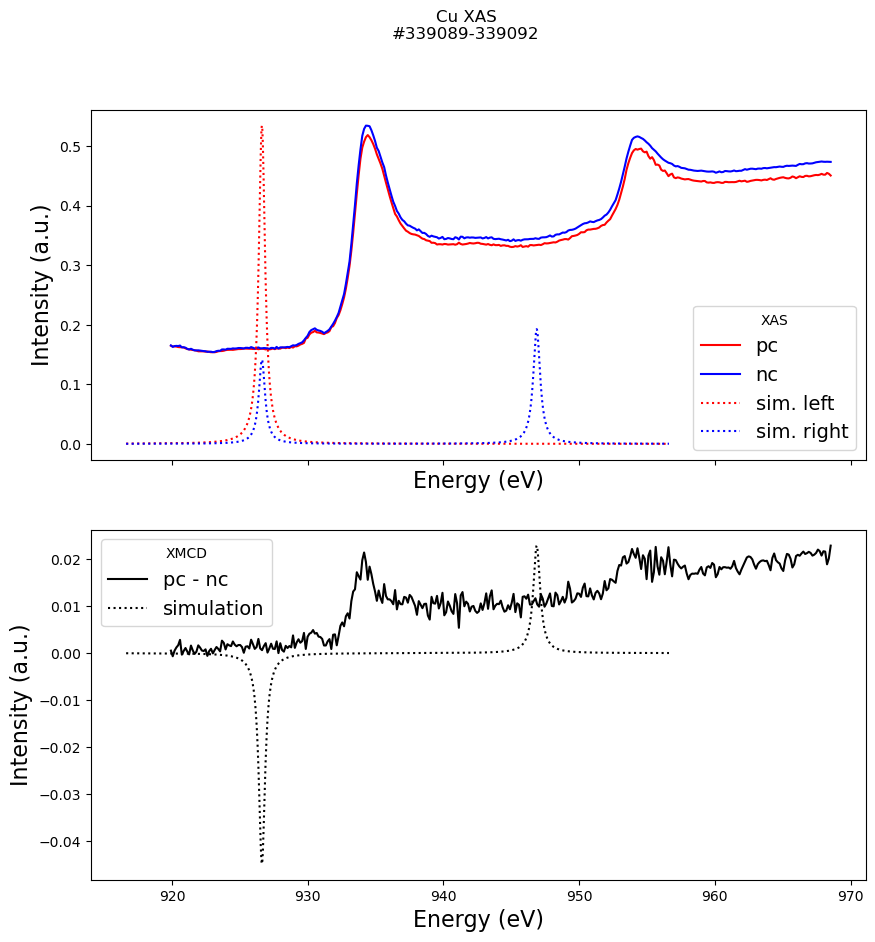

In [5]:
fig, ax = plt.subplots(2, sharex=True, figsize=(10, 10))
fig.suptitle(f"{simulation.ion} XAS\n#{scan_numbers[0]}-{scan_numbers[-1]}")

left = output['xas_left'] * max(interp_nc) / max(output['xas_left'])
right = output['xas_right'] * max(interp_pc) / max(output['xas_left'])
xmcd = output['xmcd'] * max(diff) / max(output['xmcd'])

ax[0].plot(av_energy, interp_pc, '-r', label='pc')
ax[0].plot(av_energy, interp_nc, '-b', label='nc')
ax[0].plot(output['xas_left_energy'], left, ':r', label='sim. left')
ax[0].plot(output['xas_right_energy'], right, ':b', label='sim. right')
ax[0].legend(fontsize=14, title='XAS')
ax[0].set_ylabel('Intensity (a.u.)', fontsize=16)
ax[0].set_xlabel('Energy (eV)', fontsize=16)

ax[1].plot(av_energy, diff, '-k', label='pc - nc')
ax[1].plot(output['xmcd_energy'], xmcd, ':k', label='simulation')
ax[1].legend(fontsize=14, title='XMCD')
ax[1].set_ylabel('Intensity (a.u.)', fontsize=16)
ax[1].set_xlabel('Energy (eV)', fontsize=16)

plt.show()

1025 1025
Theoretical values (Quanty):


L$_z$,S$_{eff}$,S$_{z}$,T$_{z}$
-0.3758,-0.7484,-0.4963,-0.2521


Sum rules :


sL$_z$,sS$_{eff}$
0.282943,-1.0208


Sum rules 0:


s$_0$L$_z$,s$_0$S$_{eff}$
0.251622,-0.907799


Deviations:


$\Delta$XAS (%),$\Delta$L$_{z}$ (%),$\Delta$S$_{eff}$ (%),$\Delta_0$L$_{z}$ (%),$\Delta_0$S$_{eff}$ (%)
24.8956,-24.7091,36.3977,-33.0437,21.2987


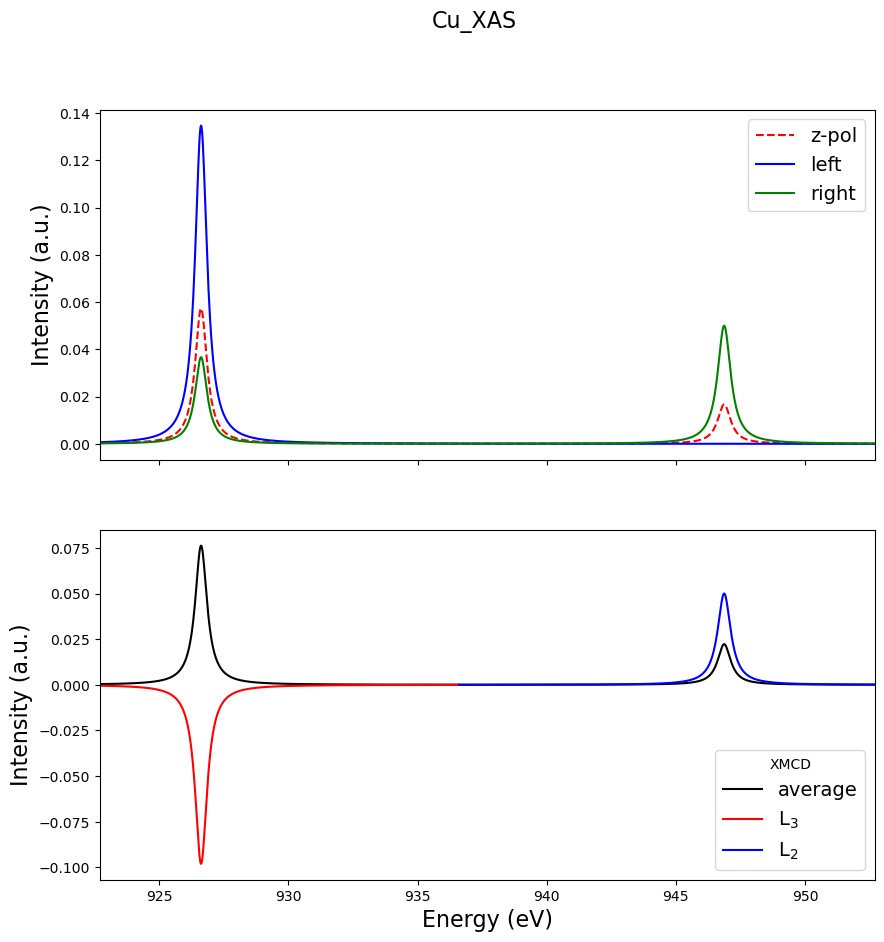

In [8]:
simulation.post_proc()